Importing the Libraries

In [927]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the collected dataset

In [928]:
data = pd.read_csv('C:/Users/USER/Desktop/Project/Model/modified_data_with_ethylene.csv')
data

,created_at,entry_id,Temperature,Humidity,Ethanol (Gas),Type of Fruit,Ethylene
0,2022-06-11T15:53:46+00:00,1,34.2,81.6,425.0,Banana,217.5
1,2022-06-11T15:54:39+00:00,2,34.3,83.8,425.0,Banana,217.5
2,2022-06-11T15:55:22+00:00,3,34.4,84.6,429.0,Banana,217.1
3,2022-06-11T15:55:55+00:00,4,34.4,85.7,438.0,Banana,216.2
4,2022-06-11T15:56:28+00:00,5,34.5,85.6,424.0,Banana,217.6
...,...,...,...,...,...,...,...
2240,2022-06-29T14:27:19+00:00,2241,34.9,96.4,290.0,Banana,195.0
2241,2022-06-29T14:27:53+00:00,2242,35.1,95.8,292.0,Banana,196.0
2242,2022-06-29T14:28:26+00:00,2243,35.2,95.3,299.0,Banana,199.5
2243,2022-06-29T14:29:00+00:00,2244,35.5,94.8,312.0,Banana,206.0


In [929]:
data["Ethanol (Gas)"].fillna(data['Ethanol (Gas)'].mean(), inplace=True) 
data["Ethylene"].fillna(data['Ethylene'].mean(), inplace=True)

data = pd.get_dummies(data, columns=['Type of Fruit'])

In [930]:
data.rename(columns= {'created_at': 'date'}, inplace=True)
data['date'] = data['date'].apply(lambda x: str(x)[:19])
data['date'] = pd.to_datetime(data['date'])

Classifying the Grades of the fruit

In [931]:
data["Grade"] = [0 for i in range (2245)]

# Grade 1: Unripe
data.loc[(data['Ethylene'] < 100) & (data['Ethanol (Gas)'] < 130), 'Grade'] = 1

# Grade 2: Ripe (perfect to eat)
data.loc[((data['Ethylene'] >= 100) & (data['Ethylene'] < 200)) & ((data['Ethanol (Gas)'] >= 130) & (data['Ethanol (Gas)'] < 210)), 'Grade'] = 2

# Grade 3: Over ripe
data.loc[((data['Ethylene'] >= 200) & (data['Ethylene'] < 300)) & ((data['Ethanol (Gas)'] >= 210) & (data['Ethanol (Gas)'] < 360)), 'Grade'] = 3

# Grade 4: Rotting stage
data.loc[(data['Ethylene'] >= 300) | (data['Ethanol (Gas)'] >= 360), 'Grade'] = 4

Getting the total hours elapsed till date

In [932]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2024, 4, 9, 14, 5, 38, 739149)

In [933]:
data['date'] = pd.to_datetime(data['date'])
data['Hours'] = (today - data['date'])/np.timedelta64(1,'h')

Sorting the hours

In [934]:
lst = list(data['Hours'])
lst.sort()
data.drop('Hours', axis=1, inplace=True)
ser = pd.Series(data = lst, index = data.index)
data['Hours'] = ser
data

,date,entry_id,Temperature,Humidity,Ethanol (Gas),Ethylene,Type of Fruit_Banana,Grade,Hours
0,2022-06-11 15:53:46,1,34.2,81.6,425.0,217.5,True,4,15599.601594
1,2022-06-11 15:54:39,2,34.3,83.8,425.0,217.5,True,4,15599.610761
2,2022-06-11 15:55:22,3,34.4,84.6,429.0,217.1,True,4,15599.620205
3,2022-06-11 15:55:55,4,34.4,85.7,438.0,216.2,True,4,15599.629372
4,2022-06-11 15:56:28,5,34.5,85.6,424.0,217.6,True,4,15599.638816
...,...,...,...,...,...,...,...,...,...
2240,2022-06-29 14:27:19,2241,34.9,96.4,290.0,195.0,True,0,16030.152983
2241,2022-06-29 14:27:53,2242,35.1,95.8,292.0,196.0,True,0,16030.162150
2242,2022-06-29 14:28:26,2243,35.2,95.3,299.0,199.5,True,0,16030.171316
2243,2022-06-29 14:29:00,2244,35.5,94.8,312.0,206.0,True,3,16030.183261


Splitting data to train, test

In [935]:
from sklearn.model_selection import train_test_split

X = data[['Temperature','Ethanol (Gas)', 'Ethylene', 'Humidity']]
y = data['Hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [936]:
from sklearn.metrics import r2_score

SVR

In [937]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)

In [938]:
# score = svr.score(X_test, y_test)
# print("R-squared:", score)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_svr)))
r2_score(y_test, pred_svr)

RMSE: 161.14632915879054


0.014999199592843127

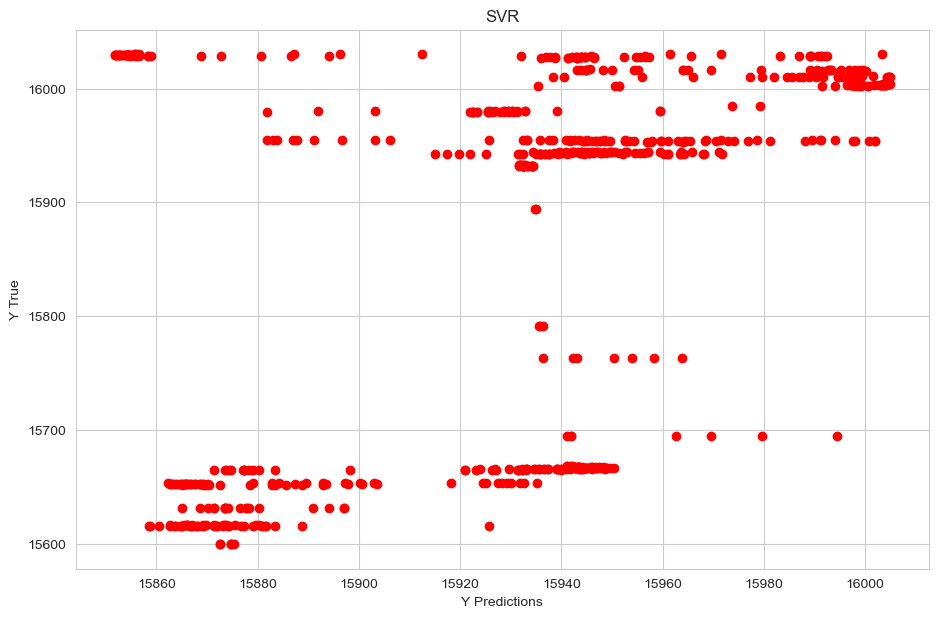

In [939]:
plt.figure(figsize=(11,7))
plt.title('SVR')
sns.set_style('whitegrid')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
plt.scatter(pred_svr, y_test, color='r')

Decision Tree

In [940]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

In [941]:
score = dtree.score(X_test, y_test)
print("R-squared: ", score)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_dtree)))
print("R2: ", r2_score(y_test,pred_dtree))

R-squared:  0.945474609688676
RMSE: 37.9141668330561
R2:  0.945474609688676


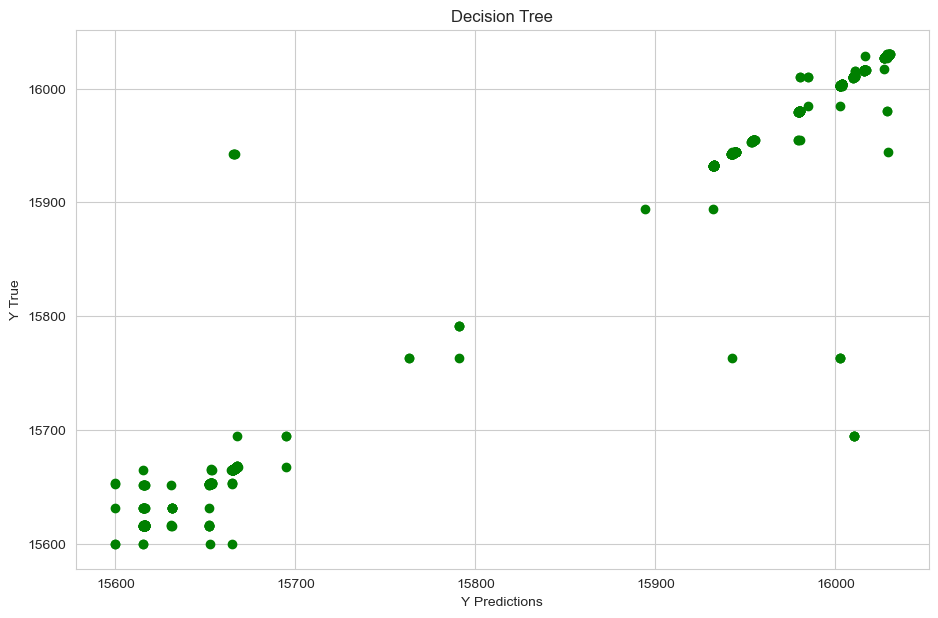

In [942]:
plt.figure(figsize=(11,7))
plt.title('Decision Tree')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
sns.set_style('whitegrid')
plt.scatter(pred_dtree, y_test, color='g')

Random Forest

In [943]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)

In [944]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rfr)))
r2_score(y_test, pred_rfr)

RMSE: 30.356327613259598


0.9650462148896085

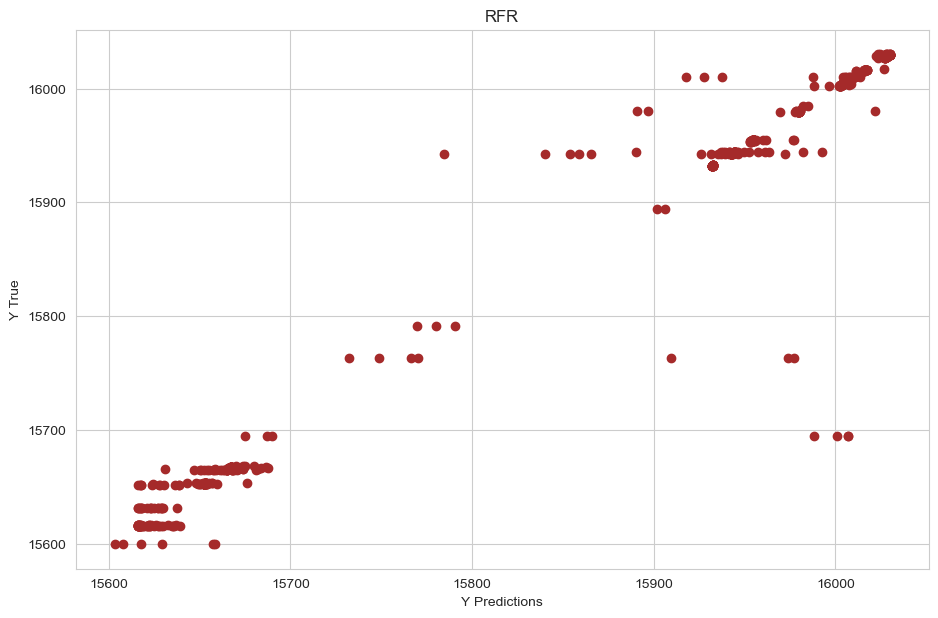

In [945]:
plt.figure(figsize=(11,7))
plt.title('RFR')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
sns.set_style('whitegrid')
plt.scatter(pred_rfr, y_test, color='brown')

Feature Importance

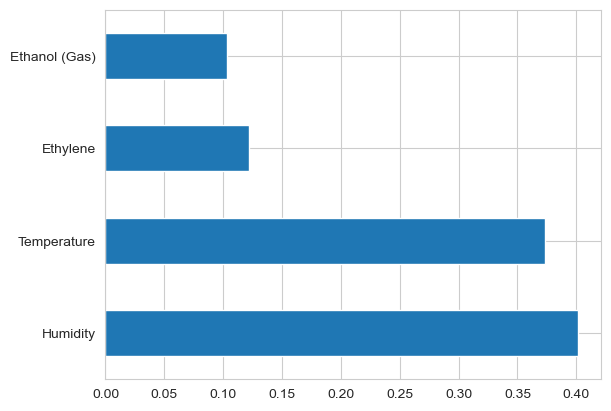

In [946]:
feature_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


XGBoost

In [947]:
import xgboost as xgb

xg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=4,
                       learning_rate=0.01,
                       min_child_weight=25,
                       gamma=0,
                       subsample=0.9,
                       colsample_bytree=0.9
                       )
xg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

pred_xg = xg.predict(X_test)

[0]	validation_0-rmse:15712.08410	validation_1-rmse:15704.80929


[100]	validation_0-rmse:5757.30123	validation_1-rmse:5750.01676
[200]	validation_0-rmse:2113.33569	validation_1-rmse:2107.26616
[300]	validation_0-rmse:777.77189	validation_1-rmse:773.85988
[400]	validation_0-rmse:287.84002	validation_1-rmse:285.20732
[500]	validation_0-rmse:109.57146	validation_1-rmse:109.01217
[600]	validation_0-rmse:47.29436	validation_1-rmse:49.91937
[700]	validation_0-rmse:29.20843	validation_1-rmse:35.03125
[800]	validation_0-rmse:24.63838	validation_1-rmse:31.82657
[900]	validation_0-rmse:22.99628	validation_1-rmse:30.62219
[1000]	validation_0-rmse:21.86373	validation_1-rmse:29.73689
[1100]	validation_0-rmse:20.93650	validation_1-rmse:28.91921
[1200]	validation_0-rmse:20.16355	validation_1-rmse:28.19032
[1300]	validation_0-rmse:19.49125	validation_1-rmse:27.66904
[1400]	validation_0-rmse:18.95285	validation_1-rmse:27.20070
[1499]	validation_0-rmse:18.50086	validation_1-rmse:26.78819


In [948]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_xg)))
r2_score(y_test, pred_xg)

RMSE: 26.788191883730416


0.972780349046698

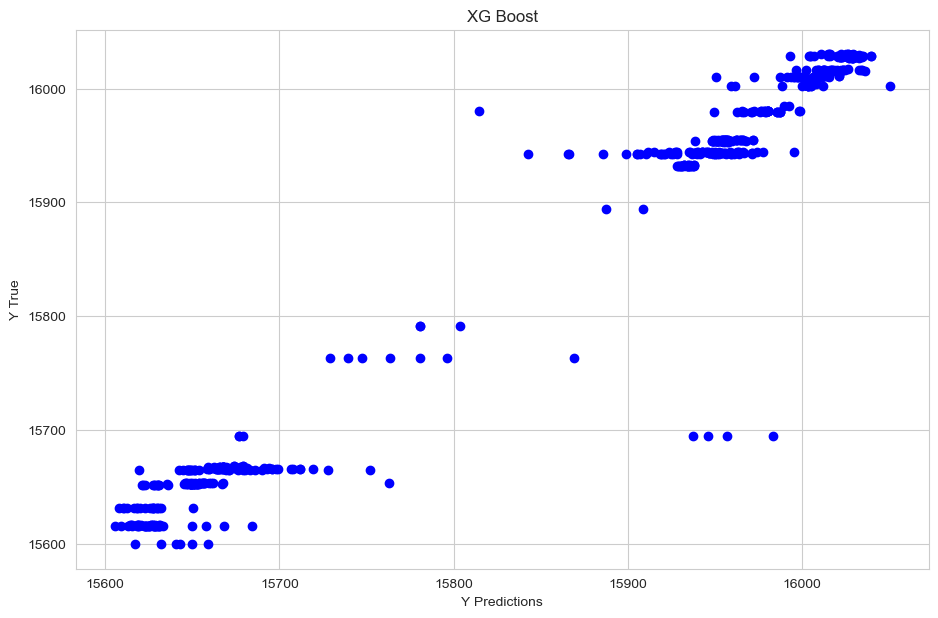

In [949]:
plt.figure(figsize=(11,7))
plt.title('XG Boost')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
sns.set_style('whitegrid')
plt.scatter(pred_xg, y_test, color='b')

In [950]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,  # Adjusted based on previous experimentation
    'learning_rate': 0.01,
    'min_child_weight': 25,  # Start with default, then try values > 1
    'gamma': 0,  # Start with 0, then experiment with larger values
    'subsample': 0.9,  # Typically between 0.5 and 1
    'colsample_bytree': 0.9,  # Typically between 0.5 and 1
}

cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=5,
                    num_boost_round=1500, early_stopping_rounds=50, 
                    metrics='rmse', as_pandas=True, seed=123)

print(cv_results)

      train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          161.690378        0.914964      161.720259       3.708797
1          160.246410        0.880833      160.294755       3.698645
2          158.858413        0.866198      158.920980       3.678473
3          157.520243        0.855847      157.595761       3.621757
4          156.180743        0.826565      156.268486       3.605631
...               ...             ...             ...            ...
1495        16.303203        0.199317       23.219448       1.512832
1496        16.301232        0.198938       23.218664       1.513416
1497        16.298685        0.199006       23.218364       1.513110
1498        16.296895        0.198971       23.217122       1.512515
1499        16.294755        0.198923       23.217184       1.513128

[1500 rows x 4 columns]
